In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [22]:
# read the dataset:
data= pd.read_csv('Mall_Customers.csv')

In [23]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [24]:
#Preprocessing our data 
data.drop('CustomerID', axis=1, inplace=True)

In [6]:
encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])
#Here we did gender mapping male as 1 and female as 0
gender_mappings = {index: label for index, label in enumerate(encoder.classes_)}
gender_mappings
 

{0: 'Female', 1: 'Male'}

In [7]:
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
scaled_data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,-0.886405,-0.276302,2.268791,1.118061
196,-0.886405,0.441365,2.497807,-0.861839
197,1.128152,-0.491602,2.497807,0.923953
198,1.128152,-0.491602,2.917671,-1.250054


In [8]:
max_clusters = 50

In [9]:
kmeans_tests = [KMeans(n_clusters=i, n_init=10) for i in range(1, max_clusters)]
inertias = [kmeans_tests[i].fit(scaled_data).inertia_ for i in range(len(kmeans_tests))]

C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

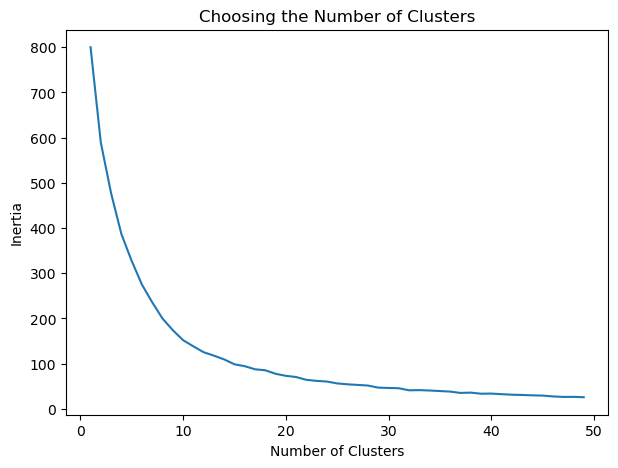

In [10]:
plt.figure(figsize=(7, 5))
plt.plot(range(1, max_clusters), inertias)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Choosing the Number of Clusters")
plt.show()

In [11]:
kmeans = KMeans(n_clusters=10, n_init=10)
kmeans.fit(scaled_data)


C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=10, n_init=10)

In [12]:
clusters = kmeans.predict(scaled_data)
clusters

array([2, 2, 1, 6, 1, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 2, 1, 2, 0, 6, 2, 2,
       0, 2, 0, 2, 0, 2, 1, 6, 0, 6, 0, 2, 0, 6, 0, 6, 1, 6, 9, 2, 3, 1,
       9, 6, 9, 1, 1, 1, 9, 2, 1, 3, 9, 3, 9, 3, 1, 3, 3, 2, 9, 9, 3, 2,
       9, 9, 2, 1, 3, 9, 9, 9, 3, 2, 9, 3, 1, 9, 3, 2, 3, 9, 1, 3, 9, 1,
       1, 9, 9, 2, 3, 1, 1, 2, 9, 1, 3, 2, 1, 9, 3, 2, 3, 1, 9, 3, 3, 3,
       3, 1, 1, 2, 1, 1, 9, 9, 9, 9, 2, 1, 1, 7, 1, 4, 3, 7, 3, 7, 5, 7,
       1, 4, 5, 4, 8, 7, 5, 4, 8, 7, 1, 4, 5, 7, 3, 4, 8, 7, 5, 7, 8, 4,
       8, 4, 5, 4, 5, 4, 8, 4, 5, 4, 3, 4, 5, 4, 8, 7, 5, 7, 5, 7, 8, 4,
       3, 7, 3, 7, 8, 4, 5, 4, 8, 7, 8, 7, 8, 4, 8, 4, 5, 4, 8, 4, 8, 7,
       5, 7])

In [13]:
#Doing PCA(Principal component analysis)
pca = PCA(n_components=2)

reduced_data = pd.DataFrame(pca.fit_transform(scaled_data), columns=['PC1', 'PC2'])

In [14]:
reduced_data

,PC1,PC2
0,-0.406383,-0.520714
1,-1.427673,-0.367310
2,0.050761,-1.894068
3,-1.694513,-1.631908
4,-0.313108,-1.810483
...,...,...
195,-1.179572,1.324568
196,0.672751,1.221061
197,-0.723719,2.765010
198,0.767096,2.861930


In [15]:
kmeans.cluster_centers_

array([[ 0.04339047,  0.86644476, -1.34262435, -1.44117578],
       [-0.88640526, -0.7284319 , -0.3343642 , -0.24586988],
       [ 1.12815215, -1.02205127, -0.75821082,  0.43783969],
       [ 1.12815215,  1.28395924, -0.03551171, -0.28670442],
       [-0.88640526, -0.47793198,  0.97284787,  1.22158511],
       [ 1.12815215, -0.36344702,  1.00919971, -1.54953487],
       [-0.88640526, -0.96084556, -1.33087991,  1.17778643],
       [ 1.12815215, -0.39989994,  1.01344075,  1.26040667],
       [-0.88640526,  0.41265847,  1.21277   , -1.11029664],
       [-0.88640526,  1.07898458, -0.30030532, -0.05853097]])

In [16]:
reduced_centers = pca.transform(kmeans.cluster_centers_)
reduced_centers

C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


array([[ 1.60433251, -1.23883165],
       [-0.53784803, -0.76139321],
       [-0.73489077,  0.27816597],
       [ 1.34472267,  0.51732261],
       [-1.38150389,  0.3644368 ],
       [ 1.07258081,  1.35727064],
       [-1.6696024 , -1.35294268],
       [-0.88272588,  1.65431318],
       [ 0.83149037,  0.21501655],
       [ 0.57658023, -0.90340433]])

In [17]:
reduced_data['cluster'] = clusters

In [18]:
reduced_data

,PC1,PC2,cluster
0,-0.406383,-0.520714,2
1,-1.427673,-0.367310,2
2,0.050761,-1.894068,1
3,-1.694513,-1.631908,6
4,-0.313108,-1.810483,1
...,...,...,...
195,-1.179572,1.324568,4
196,0.672751,1.221061,8
197,-0.723719,2.765010,7
198,0.767096,2.861930,5


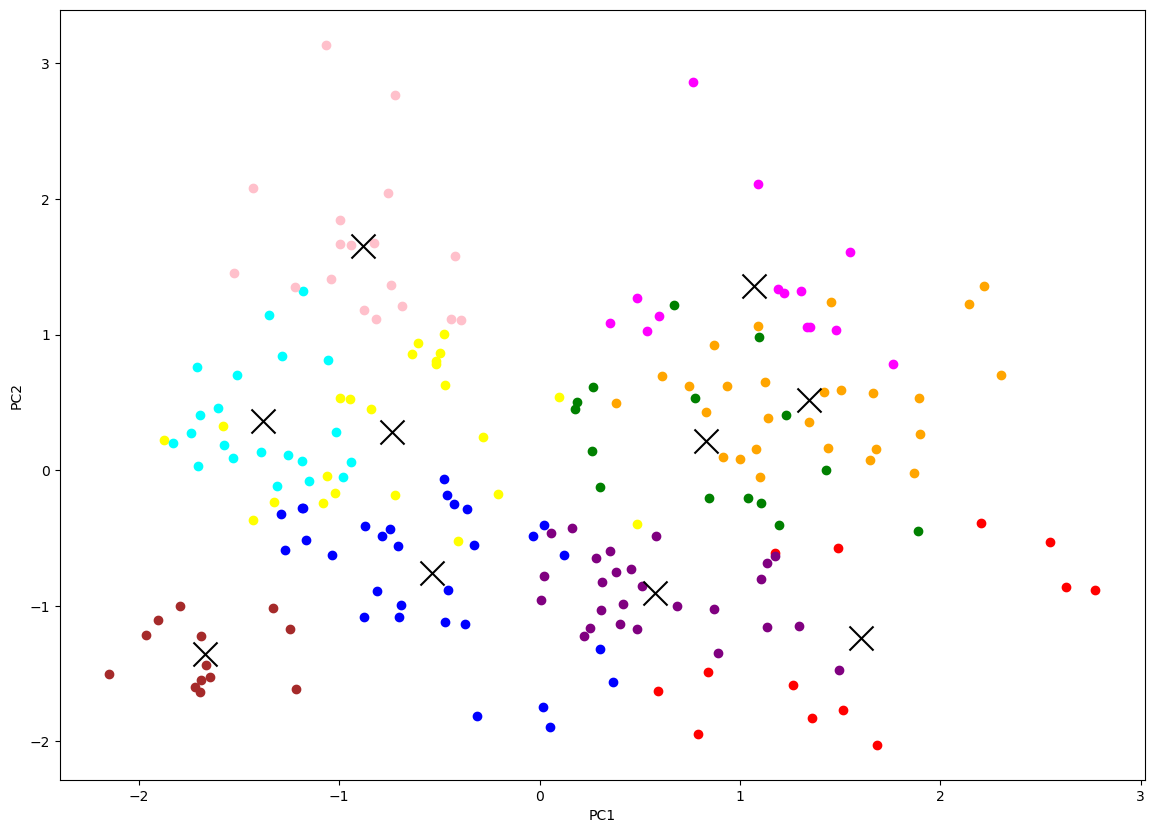

In [19]:
#Data Visualization
plt.figure(figsize=(14, 10))

plt.scatter(reduced_data[reduced_data['cluster'] == 0].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 0].loc[:, 'PC2'], color='red')
plt.scatter(reduced_data[reduced_data['cluster'] == 1].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 1].loc[:, 'PC2'], color='blue')
plt.scatter(reduced_data[reduced_data['cluster'] == 2].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 2].loc[:, 'PC2'], color='yellow')
plt.scatter(reduced_data[reduced_data['cluster'] == 3].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 3].loc[:, 'PC2'], color='orange')
plt.scatter(reduced_data[reduced_data['cluster'] == 4].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 4].loc[:, 'PC2'], color='cyan')
plt.scatter(reduced_data[reduced_data['cluster'] == 5].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 5].loc[:, 'PC2'], color='magenta')
plt.scatter(reduced_data[reduced_data['cluster'] == 6].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 6].loc[:, 'PC2'], color='brown')
plt.scatter(reduced_data[reduced_data['cluster'] == 7].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 7].loc[:, 'PC2'], color='pink')
plt.scatter(reduced_data[reduced_data['cluster'] == 8].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 8].loc[:, 'PC2'], color='green')
plt.scatter(reduced_data[reduced_data['cluster'] == 9].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 9].loc[:, 'PC2'], color='purple')

plt.scatter(reduced_centers[:, 0], reduced_centers[:, 1], color='black', marker='x', s=300)#it will reduce it into 2D 

plt.xlabel("PC1")
plt.ylabel("PC2")


plt.show()
